In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/DataMining/"

Mounted at /content/drive


# Σκέλος 1

##Ερώτημα 1
Μετράμε τις εμφανίσεις των "TV Show" και "Movie" στη στύλη type.

Οι ταινίες υπερτερούν



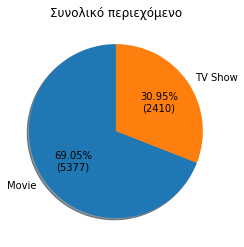

In [ ]:
import pandas as pd
df = pd.read_csv(path + 'netflix_titles.csv')

counts = df['type'].value_counts()
if counts['Movie'] > counts['TV Show']:
  print("Οι ταινίες υπερτερούν\n")
else:
  print("Οι σειρές υπερτερούν\n")

import matplotlib.pyplot as plt
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = [counts.index[0], counts.index[1]]
sizes = counts[0], counts[1]

plt.pie(sizes, labels=labels, autopct=lambda p: '{:.2f}%\n({:.0f})'.format(p,(p/100)*counts.sum()), shadow=True, startangle=90)
plt.title("Συνολικό περιεχόμενο")
plt.show()

##Ερώτημα 2
Βλέπουμε πως τα για πολύ καιρό υπήρχε μεγαλύτερη παραγωγή ταινιών, ενώ τα τελευταία 2 χρόνια, φαίνεται να έχουν ισοφαρίσει

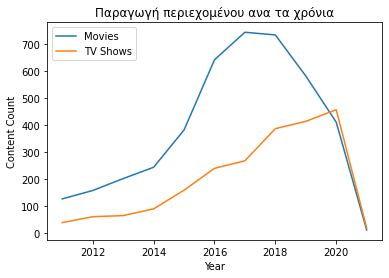

In [ ]:
import pandas as pd
df = pd.read_csv(path + 'netflix_titles.csv')

import matplotlib.pyplot as plt

df['count']=1
df = df.loc[df['release_year'] > 2010]
df1 = df.groupby(['type', 'release_year'], as_index=False)['count'].count()
movies = df1.loc[df1['type']=="Movie"]
shows = df1.loc[df1['type']=="TV Show"]
years = list(movies.release_year)
movie_count = list(movies['count'])
show_count = list(shows['count'])

plt.plot(years, movie_count)
plt.plot(years, show_count)
plt.xlabel("Year")
plt.ylabel("Content Count")
plt.legend(['Movies', 'TV Shows'])
plt.title("Παραγωγή περιεχομένου ανα τα χρόνια")
plt.show()

##Ερώτηματα 3 και 4
Από το διάγραμμα βλέπουμε ότι η Αμερική έχει το περισσότερο περιεχόμενο. Από εδώ και στο εξής κάνουμε τη σύμβαση ότι δε χρειάζεται να είναι αποκλειστική παραγωγή μιας χώρας το περιεχόμενο για να θεωρηθεί παραγωγή της. Τέλος φαίνεται η αναλογία ταινιών και σειρών σε κάθε χώρα.


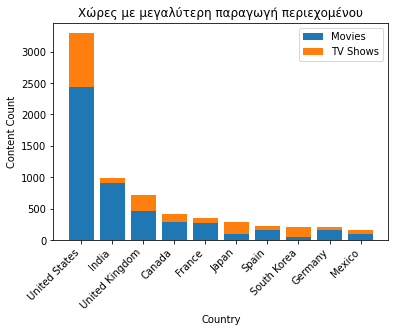

In [ ]:
import pandas as pd
df = pd.read_csv(path + 'netflix_titles.csv')

import matplotlib.pyplot as plt

df['count']=1

# Create countries set
countries_raw = list(df['country'])
countries = set()
for c in countries_raw:
  if not isinstance(c, str): continue
  s = c.split(',')
  for a in s:
    if a: countries.add(a.strip())

# Count movies and shows for each country
counts = {}
for c in countries:
  count_movies = int(df.country.loc[df.type == "Movie"].str.count(c).sum())
  count_shows = int(df.country.loc[df.type == "TV Show"].str.count(c).sum())
  counts[c]= (count_movies, count_shows)

# Get top 10
counts = sorted(counts.items(), key=lambda item: -sum(item[1]))[:10]
country_names = [x[0] for x in counts]
values_movies = [x[1][0] for x in counts]
values_shows = [x[1][1] for x in counts]

plt.bar(country_names, values_movies, label='Movies')
plt.bar(country_names, values_shows, bottom=values_movies, label='TV Shows')
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.xlabel("Country")
plt.ylabel("Content Count")
plt.title("Χώρες με μεγαλύτερη παραγωγή περιεχομένου")
plt.legend()
plt.show()

##Ερώτημα 5
**Για να τρέξει ο ακόλουθος κώδικας, πρέπει πρώτα να εκτελεστεί αυτός των ερωτημάτων 3 και 4, λόγω της χρήσης των πρώτων χωρών στη πραγαγωγή**

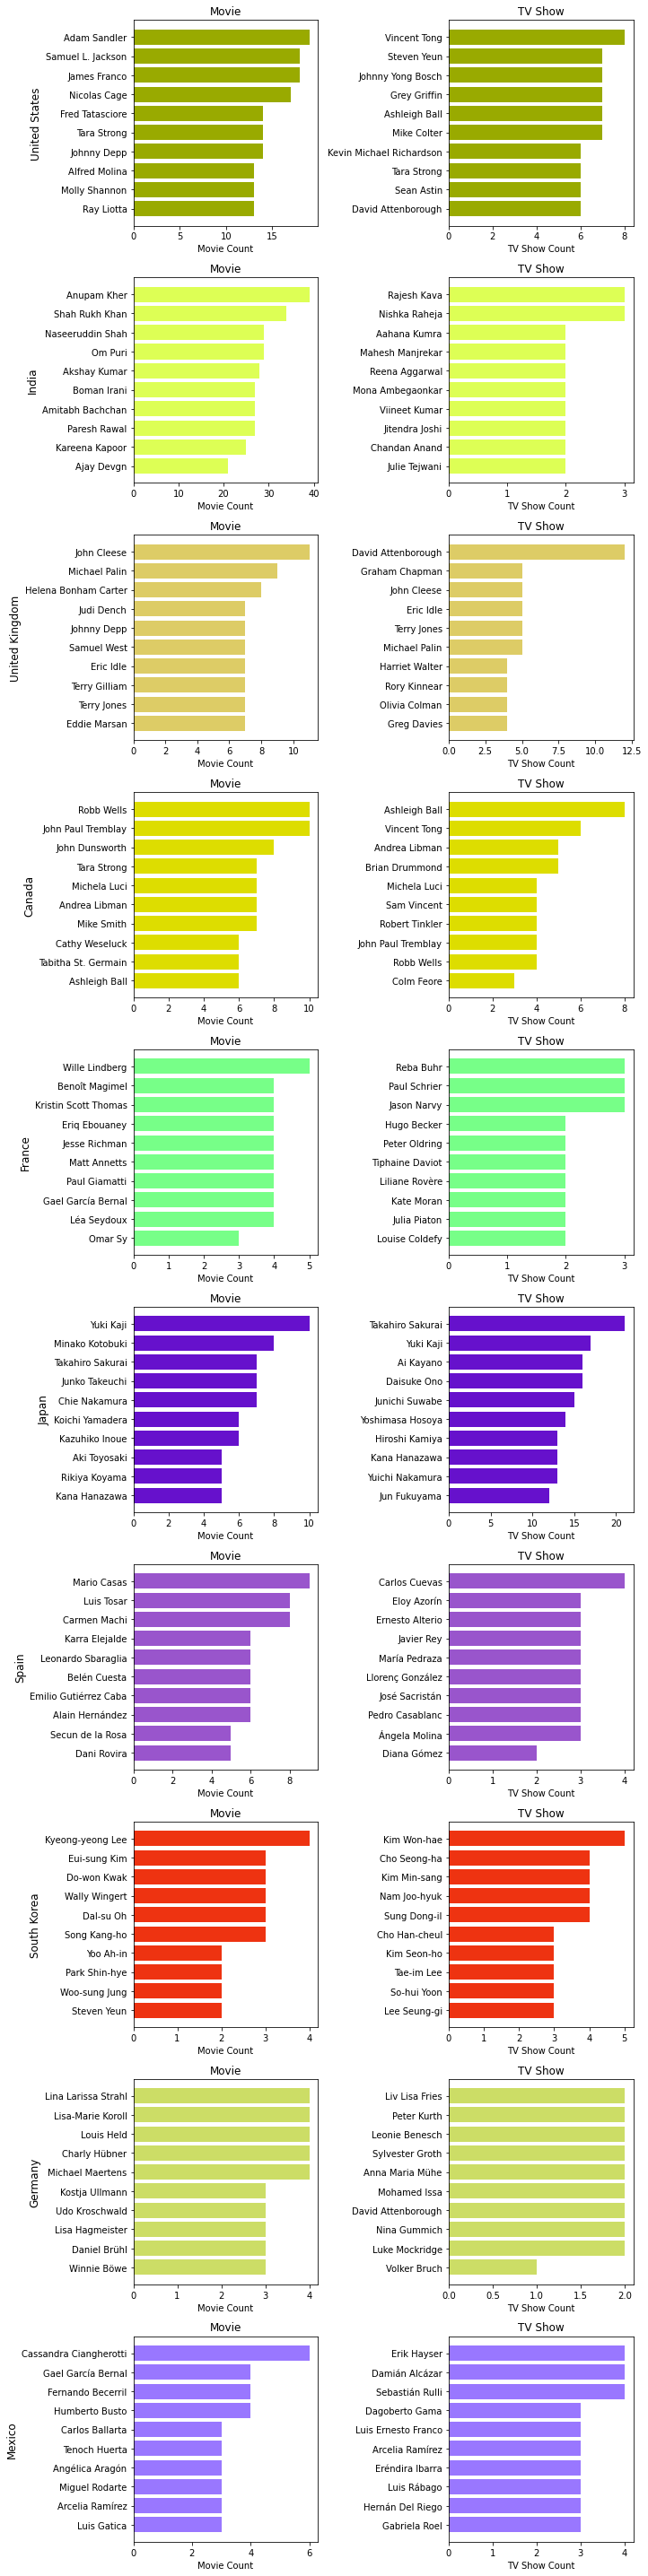

In [ ]:
import pandas as pd
df = pd.read_csv(path + 'netflix_titles.csv')

import matplotlib.pyplot as plt

import random

df['count']=1

# Create countries set
countries_raw = list(df['country'])
countries = set()
for c in countries_raw:
  if not isinstance(c, str): continue
  s = c.split(',')
  for a in s:
    if a: countries.add(a.strip())

df.fillna('', inplace=True)

top_countries = country_names
types = ['Movie', 'TV Show']


fig, ax = plt.subplots(len(top_countries),2)

for t_e, t in enumerate(top_countries):
  color = "#%03x" % random.randint(0x555, 0xFFF)
  for content_e, content in enumerate(types):
    country_content = df.loc[df['type'] == content]
    country_content = country_content.loc[country_content['country'].str.contains(t)]
    cast_raw = list(country_content['cast'])
    count = {}
    for c in cast_raw:
      if not isinstance(c, str): continue
      s = c.split(',')
      for a in s:
        a = a.strip()
        if a:
          if a not in count: count[a] = 1
          else: count[a] += 1
    
    count = sorted(count.items(), key=lambda item: -item[1])[:10]
    names = [x[0] for x in count]
    values = [x[1] for x in count]
    names.reverse()
    values.reverse()

    ax[t_e][content_e].barh(names, values, color=color)
    ax[t_e][content_e].title.set_text(content)
    ax[t_e][content_e].set_xlabel(content + ' Count')
  ax[t_e][0].set_ylabel(t, size='large')
fig.set_figwidth(10)
fig.set_figheight(4*len(top_countries))
plt.tight_layout()
plt.show()


##Ερώτημα 6



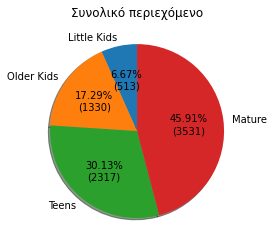

In [ ]:
import pandas as pd
df = pd.read_csv(path + 'netflix_titles.csv')
import matplotlib.pyplot as plt
audiences={"G" : "Little Kids","TV-Y" : "Little Kids","TV-G" : "Little Kids","PG" : "Older Kids","TV-Y7" : "Older Kids","TV-Y7-FV" : "Older Kids","TV-PG" : "Older Kids","PG-13" : "Teens" ,"TV-14" : "Teens" ,"R" : "Mature" ,"NC-17" : "Mature" ,"TV-MA" : "Mature" }
audiences
groups={"Little Kids" : 0,"Older Kids" : 0,"Teens" : 0,"Mature" : 0}
df1 = df.groupby(['rating'], as_index=False).count()
df1= df1.loc[df1['rating']!="UR"]
df1= df1.loc[df1['rating']!="NR"].reset_index()
df1
for (x,y) in zip(df1.rating,df1.show_id):
  groups[audiences[x]]+=y
labels =groups.keys()
sizes = groups.values()
# print(groups)
# print(groups.values())
plt.pie(sizes, labels=labels, autopct=lambda p: '{:.2f}%\n({:.0f})'.format(p,(p/100)*sum(groups.values())), shadow=True, startangle=90)
plt.title("Συνολικό περιεχόμενο")
plt.show()

##Ερώτημα 7

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/dist-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


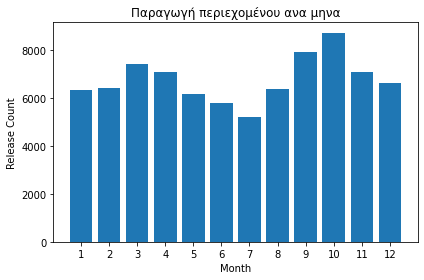

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv(path + 'IMDb movies.csv')
df['count']=1

df = df.loc[df['date_published'].str.contains("^\d{4}\-(0?[1-9]|1[012])\-(0?[1-9]|[12][0-9]|3[01])$", regex=True)]
df['month'] = pd.to_datetime(df['date_published']).dt.month
counts = df.groupby('month')['count'].count()
names = range(1,13)
values = list(counts)
plt.bar(names, values)
plt.xticks(range(1,13))
plt.xlabel("Month")
plt.ylabel("Release Count")
plt.title("Παραγωγή περιεχομένου ανά μήνα")
plt.tight_layout()
plt.show()

##Ερώτημα 8

{'Stand-Up Comedy', 'TV Horror', 'Dramas', 'Sci-Fi & Fantasy', 'TV Comedies', 'TV Sci-Fi & Fantasy', 'Independent Movies', 'Stand-Up Comedy & Talk Shows', 'LGBTQ Movies', "Kids' TV", 'Anime Series', 'Faith & Spirituality', 'Horror Movies', 'Music & Musicals', 'Romantic Movies', 'Documentaries', 'TV Shows', 'Teen TV Shows', 'Spanish-Language TV Shows', 'TV Mysteries', 'Classic & Cult TV', 'TV Dramas', 'Anime Features', 'British TV Shows', 'Classic Movies', 'Cult Movies', 'Docuseries', 'Crime TV Shows', 'Thrillers', 'Comedies', 'Children & Family Movies', 'Romantic TV Shows', 'International TV Shows', 'Reality TV', 'TV Action & Adventure', 'TV Thrillers', 'Movies', 'Sports Movies', 'Action & Adventure', 'Korean TV Shows', 'International Movies', 'Science & Nature TV'}
[('Movies', 3937), ('Dramas', 2810), ('International Movies', 2437), ('Comedies', 1996), ('TV Shows', 1572), ('International TV Shows', 1199), ('Action & Adventure', 871), ('Documentaries', 786), ('TV Dramas', 704), ('Indep

No handles with labels found to put in legend.


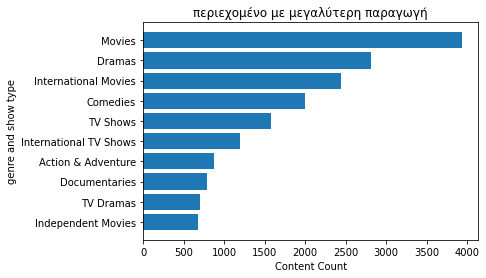

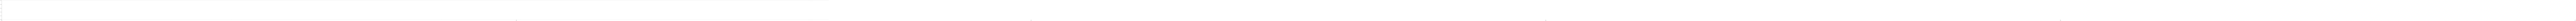

In [ ]:
import pandas as pd
df = pd.read_csv(path + 'netflix_titles.csv')

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import random

df['count']=1

# Create countries set
types_genres_raw = list(df['listed_in'])
types_genres = set()
for c in types_genres_raw:
  if not isinstance(c, str): continue
  s = c.split(',')
  for a in s:
    if a: types_genres.add(a.strip())

df.fillna('', inplace=True)
print(types_genres)
# print(len(types_genres))



# fig, ax = plt.subplots(len(types_genres),1)
count = {}
for t_e, t in enumerate(types_genres):
  color = "#%03x" % random.randint(0x555, 0xFFF)
  types_genres_content = df.loc[df['listed_in'].str.contains(t)]
  types_genres_content = list(types_genres_content['listed_in'])
  # if t not in count: count[t] = 0
  count[t] = len(types_genres_content)
count = sorted(count.items(), key=lambda item: -item[1])[:10]
print(count)
names = [x[0] for x in count]
values = [x[1] for x in count]
names.reverse()
values.reverse()

plt.barh(names, values, label='Movies')
# plt.bar(country_names, values_shows, bottom=values_movies, label='TV Shows')
# plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.xlabel("Content Count")
plt.ylabel("genre and show type")
plt.title("περιεχομένο με μεγαλύτερη παραγωγή")
# plt.set_figwidth(10)
figure(figsize=(800, 6), dpi=80)
plt.legend()
plt.show()

##Ερώτημα 9


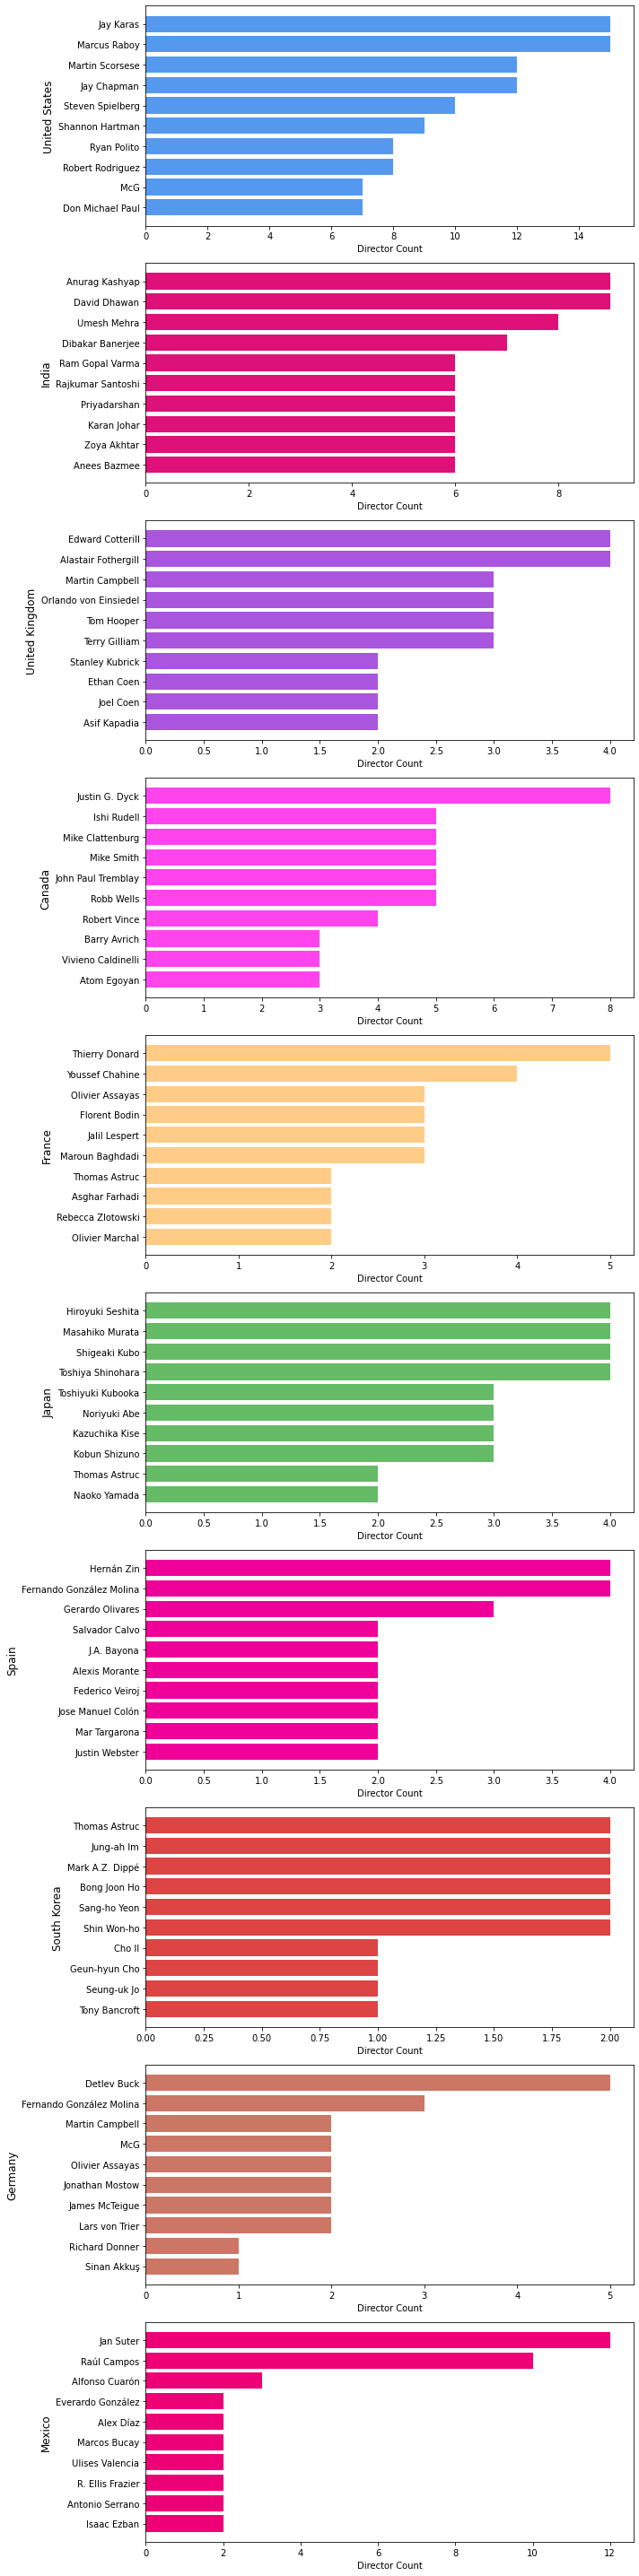

In [ ]:
import pandas as pd
df = pd.read_csv(path + 'netflix_titles.csv')

import matplotlib.pyplot as plt

import random

df['count']=1

# Create countries set
directors_raw = list(df['director'])
directors = set()
for c in directors_raw:
  if not isinstance(c, str): continue
  s = c.split(',')
  for a in s:
    if a: directors.add(a.strip())

df.fillna('', inplace=True)

top_countries = country_names

fig, ax = plt.subplots(len(top_countries),1)

for t_e, t in enumerate(top_countries):
  color = "#%03x" % random.randint(0x555, 0xFFF)
  country_content = df.loc[df['country'].str.contains(t)]
  directors_raw = list(country_content['director'])
  count = {}
  for c in directors_raw:
    if not isinstance(c, str): continue
    s = c.split(',')
    for a in s:
      a = a.strip()
      if a:
        if a not in count: count[a] = 1
        else: count[a] += 1
  count = sorted(count.items(), key=lambda item: -item[1])[:10]
  names = [x[0] for x in count]
  values = [x[1] for x in count]
  names.reverse()
  values.reverse()
  ax[t_e].barh(names, values, color=color)
  ax[t_e].title.set_text(content)
  ax[t_e].set_xlabel('Director Count')
  ax[t_e].set_ylabel(t, size='large')
fig.set_figwidth(10)
fig.set_figheight(4*len(top_countries))
plt.tight_layout()
plt.show()

##Ερώτημα 10

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
No handles with labels found to put in legend.


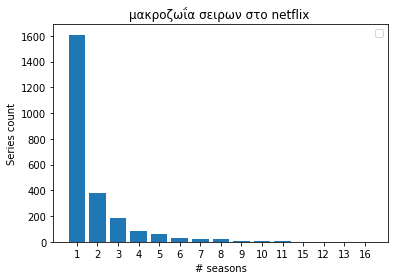

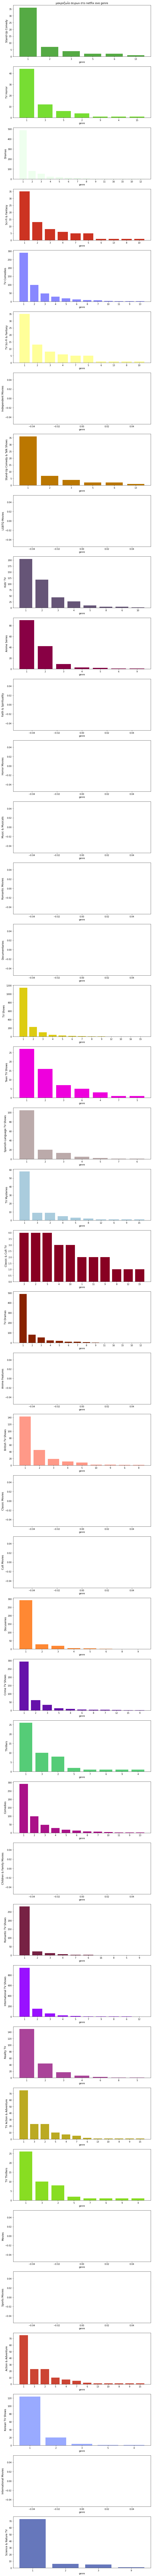

In [ ]:
import pandas as pd
df = pd.read_csv(path + 'netflix_titles.csv')

import matplotlib.pyplot as plt

import random

df['count']=1
df=df.loc[df['type']=='TV Show'].reset_index()
for i in range(0,len(df)):
  df['duration'][i]=df['duration'][i].split()[0]
df['duration']
counts=df['duration'].value_counts()
names=counts.keys().tolist()
values=counts.tolist()
plt.bar(names, values)
plt.xlabel("# seasons")
plt.ylabel("Series count")
plt.title("μακροζωΐα σειρων στο netflix ")
plt.legend()
plt.show()


fig, ax = plt.subplots(len(types_genres),1)

# count = {}
for t_e, t in enumerate(types_genres):
  color = "#%03x" % random.randint(0x555, 0xFFF)
  types_genres_content = df.loc[df['listed_in'].str.contains(t)]
  counts=types_genres_content['duration'].value_counts()
  names=counts.keys().tolist()
  values=counts.tolist()
  ax[t_e].bar(names, values, color=color)
  # ax[t_e].title.set_text(content)
  ax[t_e].set_xlabel('genre')
  ax[t_e].set_ylabel(t, size='large')
fig.set_figwidth(10)
fig.set_figheight(4*len(types_genres))
# fig.suptitle("μακροζωΐα σειρων στο netflix ανα genre")
#plt.gca().set_title('μακροζωΐα σειρων στο netflix ανα genre')
ax[0].title.set_text('μακροζωΐα σειρων στο netflix ανα genre')
plt.tight_layout()
plt.show()

##Ερώτημα 11

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt

df1 = pd.read_csv(path + 'IMDb movies.csv')
df2 = pd.read_csv(path + 'netflix_titles.csv')

df1 = df1[['original_title','avg_vote']].sort_values('avg_vote', ascending=False)
df2 = df2['title']
dfm = df1.merge(df2, how="inner", left_on="original_title", right_on="title")[['title','avg_vote']]
dfm.sort_values('avg_vote', ascending=False, inplace = True)
dfm.reset_index(drop=True).head(10)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,title,avg_vote
0,Innocent,9.0
1,Breakout,9.0
2,Pulp Fiction,8.9
3,The Lord of the Rings: The Return of the King,8.9
4,Schindler's List,8.9
5,Inception,8.8
6,The Lord of the Rings: The Two Towers,8.7
7,The Matrix,8.7
8,Eh Janam Tumhare Lekhe,8.6
9,Ani... Dr. Kashinath Ghanekar,8.6


# Recommendation System

## Initialization

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import jaccard_score
from sklearn.metrics.pairwise import cosine_similarity
from tqdm import tqdm
import heapq

## **(1A)**
Δημιουργία BoW με unigrams και bigrams, μετά από πειραματισμό με τις τιμές των min_df, max_df και max_features. Αποφασίσαμε να μη κρατήσουμε τις λέξεις που εμφανίζονται μία μόνο φορα στο dataset, καθώς δε θα χρησιμεύσουν στις συγκρίσεις. Έπειτα πειραματιστήκαμε με το max_df με σκόπο να αποκλείσουμε συχνές λέξεις της αγγλικής γλώσσας όπως 'and', 'an', 'his' κτλ., διότι δεν είναι πολίτιμες για την σημασιολογική ομοιότητα των περιγραφών.

### <u>DF</u>

In [ ]:
# Import data from csv
df = pd.read_csv(path + 'netflix_titles.csv')
df = df[['show_id', 'title', 'description']].loc[df['type']=='Movie'].head(200)

# Initial dataset
dataset = list(df['description'])

# Set parameters
min_df=2
max_df=0.04
max_features=20000

# Vectorize data
vectorizer = CountVectorizer(ngram_range=(1,2), min_df=min_df, max_df=max_df, max_features=max_features, binary=True)
X1 = vectorizer.fit_transform(dataset)
print(vectorizer.get_feature_names())
# X1.toarray()

['12', '1970s', '1980', '27', 'about', 'accident', 'accidentally', 'act', 'action', 'activist', 'adventure', 'after devastating', 'after her', 'after his', 'after the', 'again', 'against', 'against the', 'age', 'age of', 'agent', 'aging', 'agrees', 'agrees to', 'aldovia', 'alive', 'all', 'along', 'amber', 'american', 'amid', 'amid an', 'amy', 'an all', 'an aspiring', 'an experimental', 'an increasingly', 'and his', 'and soon', 'and the', 'anniversary', 'antics', 'apartment', 'apartment complex', 'are', 'as an', 'as he', 'as her', 'asks', 'aspiring', 'assassin', 'at christmas', 'at the', 'athlete', 'attacks', 'attempts', 'attempts to', 'aunt', 'avenge', 'baby', 'back', 'back to', 'based', 'based on', 'basketball', 'battle', 'battles', 'became', 'become', 'been', 'begin', 'begins', 'begins to', 'best friend', 'best friends', 'best of', 'birthday', 'bizarre', 'both', 'boxer', 'boy', 'bring', 'bringing', 'brings', 'brothers', 'brutal', 'bus', 'business', 'but as', 'but her', 'but the', 'by

##**(1B)**

Βρίσκουμε το td-idf με τη βοήθεια της συνάρτησης **TfidfVectorizer** η οποία υπολογίζει το tf, το idf και τα πολλαπλασίαζει για το τελικό αποτέλεσμα

### <u>TF-IDF</u>

In [ ]:
# Vectorize data
vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df=min_df, max_df=max_df, max_features=max_features)
X2 = vectorizer.fit_transform(dataset)
X2.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.30820288, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

## **(2)**


### Similarity matrices
Δημιουργία δύο τριγωνικών πινάκων (ένα για κάθε αλγόριθμο) που περιέχει τις ομοιότητες δύο ταινιών *i* και *j* με *i>j* στη θέση *i,j*.

In [ ]:
### Jaccardi similarity matrix ### 

A1 = X1.toarray()

# Initialize matrix
jacc_sim = []
for i in range(1,len(A1)+1):
  jacc_sim.append([0 for j in range(i)])

# Set similarity
for i in tqdm(range(len(A1))):
  for j in range(i):
    jacc_sim[i][j] = jaccard_score(A1[i],A1[j])

100%|██████████| 200/200 [00:17<00:00, 11.47it/s]


In [ ]:
### Cosine similarity maxtrix ### 

A2 = X2.toarray()

# Initialize matrix
cos_sim = []
for i in range(1,len(A2)+1):
  cos_sim.append([0 for j in range(i)])

# Set similarity
for i in tqdm(range(len(A2))):
  for j in range(i):
    cos_sim[i][j] = float(cosine_similarity([A2[i]],[A2[j]]))

100%|██████████| 200/200 [00:07<00:00, 26.19it/s]


### Top 100 similar movies

Για κάθε ταινία δημιουργείται ένα dictionary το οποίο περιέχει την ομοιότητα την ταινίας με τις 100 πιο ομοιές της.

In [ ]:
# Get similarity value
def get_similarity(sim, a, b):
  m1 = max(a,b)
  m2 = min(a,b)
  return sim[m1][m2]

# Get top 100 similar movies according to Jaccardi
jacc_similarities = []
for i in range(len(A1)):
  top_sim = {}
  for j in range(len(A1)):
    if i==j: continue
    top_sim[j] = get_similarity(jacc_sim, i,j)
  top_sim = dict(sorted(top_sim.items(), key=lambda x: x[1], reverse=True)[:100])
  jacc_similarities.append(top_sim)

# Get top 100 similar movies according to Cosine
cos_similarities = []
for i in range(len(A2)):
  top_sim = {}
  for j in range(len(A2)):
    if i==j: continue
    top_sim[j] = get_similarity(cos_sim, i,j)
  top_sim = dict(sorted(top_sim.items(), key=lambda x: x[1], reverse=True)[:100])
  cos_similarities.append(top_sim)


print(jacc_similarities[0].keys())
print(cos_similarities[0].keys())

dict_keys([191, 101, 138, 142, 12, 86, 113, 21, 139, 152, 20, 27, 48, 55, 170, 172, 144, 199, 176, 194, 88, 133, 125, 167, 164, 186, 5, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 22, 23, 24, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80])
dict_keys([191, 101, 138, 12, 142, 86, 21, 113, 55, 152, 139, 20, 27, 172, 170, 199, 48, 88, 194, 144, 176, 133, 125, 164, 167, 5, 186, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 22, 23, 24, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80])


In [ ]:
print(df.iloc[0]['description'])
print(df.iloc[191]['description'])

After a devastating earthquake hits Mexico City, trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive.
Mexico City restaurant star Gabriela Cámara opens sister eatery Cala in San Francisco, with a similar menu and unusually welcoming kitchen culture.


In [ ]:
df

,show_id,title,description
1,s2,7:19,After a devastating earthquake hits Mexico Cit...
2,s3,23:59,"When an army recruit is found dead, his fellow..."
3,s4,9,"In a postapocalyptic world, rag-doll robots hi..."
4,s5,21,A brilliant group of students become card-coun...
6,s7,122,"After an awful accident, a couple admitted to ..."
...,...,...,...
647,s648,Azhar,This biopic traces the tumultuous life and car...
648,s649,Aziz Ansari Live at Madison Square Garden,"Stand-up comedian and TV star Aziz Ansari (""Pa..."
649,s650,Aziz Ansari: Buried Alive,"""Parks and Recreation"" star Aziz Ansari takes ..."
650,s651,Aziz Ansari: RIGHT NOW,"In a comedy special directed by Spike Jonze, A..."


## **(3)**



In [ ]:
def get_similar_movies(movie_name, mode='tf-idf', n=5):
  # Get movie index
  movie_index = int(df.loc[df['title']==movie_name].index.values)

  # Print movie info
  print("Title:")
  print(df.loc[movie_index].title)
  print("Description:")
  print(df.loc[movie_index].description)

  # Get similar movies
  if mode == "tf-idf":
    result =  jacc_similarities[movie_index-1]
  elif mode == "boolean":
    result = cos_similarities[movie_index-1]#we calculated the 100 most similar movies in the previous exercise. now we keep n most similar
  result = sorted(result.items(), key=lambda x: x[1], reverse=True)[:n]

  # Print recommended movies
  print("\nRecommended Movies:")
  print("-------------------")
  for i, m in enumerate([x[0] for x in result]):
    print(f"\n({i+1}) Title:")
    print(df.iloc[m].title)
    print("Description:")
    print(df.iloc[m].description)

  return result

movie_name = '7:19'
_ = get_similar_movies(movie_name, 'boolean', 5)

Title:
7:19
Description:
After a devastating earthquake hits Mexico City, trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive.

Recommended Movies:
-------------------

(1) Title:
A Tale of Two Kitchens
Description:
Mexico City restaurant star Gabriela Cámara opens sister eatery Cala in San Francisco, with a similar menu and unusually welcoming kitchen culture.

(2) Title:
6 Balloons
Description:
A loyal sister struggles to stay afloat while driving her heroin-addicted brother to a detox center and looking after his 2-year-old daughter.

(3) Title:
A Flying Jatt
Description:
A timid man gets unexpected superpowers while trying to save his family's land and a sacred tree from a ruthless tycoon.

(4) Title:
22-Jul
Description:
After devastating terror attacks in Norway, a young survivor, grieving families and the country rally for justice and healing. Based on a true story.

(5) Title:
A Glimpse Inside the Mind of Charles Swan III
Descriptio

## **(4)**

In [ ]:
def get_similar_movies2(movie_desc, mode='tf-idf', n=5):
  df = pd.read_csv(path + 'netflix_titles.csv')
  df = df[['show_id', 'title', 'description']].loc[df['type']=='Movie'].head(200)
  df2 = pd.DataFrame({"show_id":['s'+str(len(df)+1)],
                      "title":['new movie'],
                      "description":[movie_desc]})
  print(df2)
  df.append(df2, ignore_index = True)
  # Initial dataset
  dataset = list(df['description'])
  if mode=='tf-idf':
    











get_similar_movies2("Batman and Wonder Woman recruit The Flash, Aquaman, and Cyborg after Superman's death to save the world from the catastrophic threat of Steppenwolf and his army of Parademons.", mode='tf-idf', n=5)

  show_id      title                                        description
0    s201  new movie  Batman and Wonder Woman recruit The Flash, Aqu...
